Here we will read the binary files generated by Evolve.

In [84]:
using Plots
T = Float64;
include("cheb.jl")

zmin = T(1.e-15)
zmax = T(.5);

DiffMats2, DiffMats, grid = MultiGridChebyshev(zmin, zmax, 4,15);

function UnrollMonitor(monitorarr)
    n = Int64(length(monitorarr)/7);

    timearr = Vector{Float64}(undef,n);
    xarr = Vector{Float64}(undef,n);
    a4arr = Vector{Float64}(undef,n);
    epsarr = Vector{Float64}(undef,n);
    momarr = Vector{Float64}(undef,n);
    oparr = Vector{Float64}(undef,n);
    constrarr = Vector{Float64}(undef,n);


    for i in 1:n
        j = i-1;
        timearr[i]   = monitorarr[j*7 + 1];
        xarr[i]      = monitorarr[j*7 + 2];
        a4arr[i]     = monitorarr[j*7 + 3];
        epsarr[i]    = monitorarr[j*7 + 4];
        momarr[i]    = monitorarr[j*7 + 5];
        oparr[i]     = monitorarr[j*7 + 6];
        constrarr[i] = monitorarr[j*7 + 7];
    end

    return timearr, xarr, a4arr, epsarr, momarr, oparr, constrarr
end

function UnrollVariables(outputarr)
    n = Int64(length(outputarr) / 300);

    PhiMat = Matrix{Float64}(undef,n,60);
    SMat = Matrix{Float64}(undef,n,60);
    SdotMat = Matrix{Float64}(undef,n,60);
    PhidotMat = Matrix{Float64}(undef,n,60);
    AMat = Matrix{Float64}(undef,n,60);

    for i in 1:n
        j = i-1;
        for pos in 1:60
            k = pos-1
            PhiMat[i,pos] = outputarr[j*300 + k*5 + 1];
            SMat[i,pos] = outputarr[j*300 + k*5 + 2];
            SdotMat[i,pos] = outputarr[j*300 + k*5 + 3];
            PhidotMat[i,pos] = outputarr[j*300 + k*5 + 4];
            AMat[i,pos] = outputarr[j*300 + k*5 + 5];
        end
    end

    return PhiMat, SMat, SdotMat, PhidotMat, AMat
end

UnrollVariables (generic function with 1 method)

In [85]:
readarr = [];
OutputArr = [];

monitorfile = open("FlatMonitorA4100.bin","r");
outfile = open("FlatOutputA4100.bin","r");


n = filesize(monitorfile) / (7*sizeof(Float64));
print(n);
for ii in 1:7*n
    push!(readarr,read(monitorfile,Float64));
end
for ii in 1:5*60*n
    push!(OutputArr, read(outfile,Float64));
end

close(monitorfile)
close(outfile)

5.0

In [86]:
Time, Gauge, A4, Energy, Momentum, Operator, Constraint = UnrollMonitor(readarr);
PhiVals, SVals, SdotVals, PhidotVals, AVals = UnrollVariables(OutputArr); 

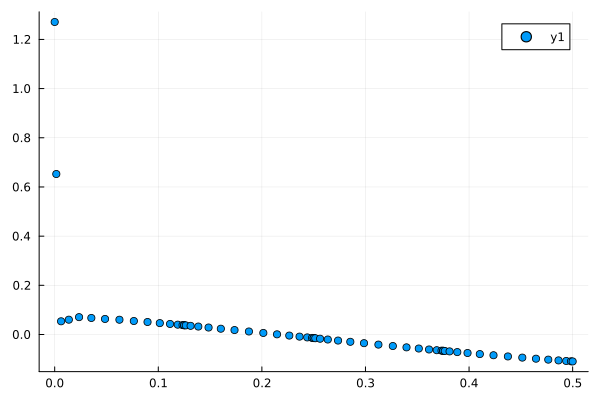

In [87]:
scatter(grid,SVals[end,:])

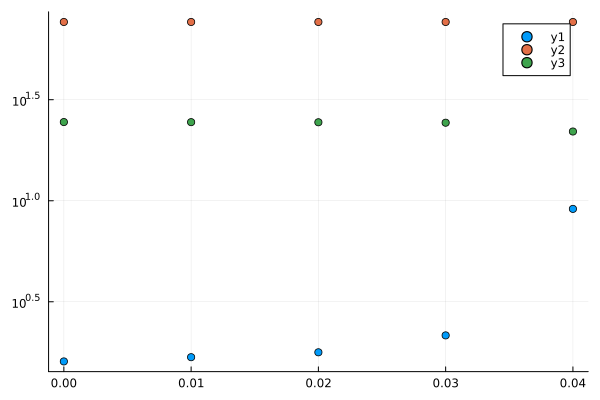

In [88]:
scatter(Time, Operator, yscale=:log10)
scatter!(Time, Energy)
scatter!(Time, Momentum)

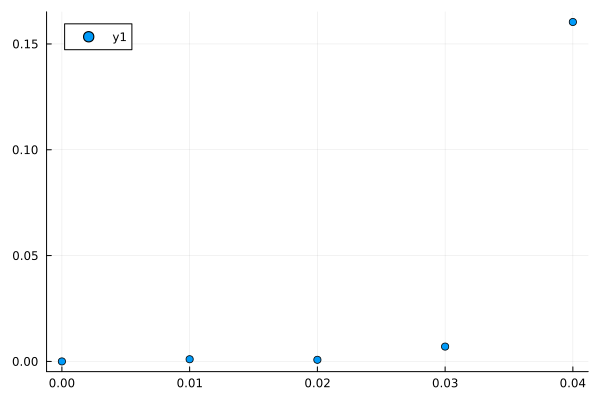

In [89]:
scatter(Time, Constraint)